# Introduction

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("mushroom classification.csv")

# Examining data

In [4]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,output
0,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE
1,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
2,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE
3,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
4,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8416 non-null   object
 1   cap-surface               8416 non-null   object
 2   cap-color                 8416 non-null   object
 3   bruises                   8416 non-null   object
 4   odor                      8416 non-null   object
 5   gill-attachment           8416 non-null   object
 6   gill-spacing              8416 non-null   object
 7   gill-size                 8416 non-null   object
 8   gill-color                8416 non-null   object
 9   stalk-shape               8416 non-null   object
 10  stalk-root                8416 non-null   object
 11  stalk-surface-above-ring  8416 non-null   object
 12  stalk-surface-below-ring  8416 non-null   object
 13  stalk-color-above-ring    8416 non-null   object
 14  stalk-color-below-ring  

In [6]:
data["output"].unique()

array(['EDIBLE', 'POISONOUS'], dtype=object)

# Manipulating Data


In [7]:
#changing the output value to 1 and 0 (1 for poisonous) and (0 for edible)
data["output"] = [1 if i == "POISONOUS" else 0 for i in data["output"]]

In [8]:
data["output"].unique()

array([0, 1])

In [9]:
# Dropping "veil-type" column.
data.drop("veil-type",axis=1,inplace=True)

In [10]:
#Make all values in float from strings
for column in data.drop(["output"], axis=1).columns:
    value = 0
    step = 1/(len(data[column].unique())-1)
    for i in data[column].unique():
        data[column] = [value if letter == i else letter for letter in data[column]]
        value += step

In [11]:
#data converted in float  
data_check = data.head()
data_check = data_check.append(data.tail())
data_check


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,output
0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0
1,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.000000,0
2,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.090909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0
3,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.090909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.000000,0
4,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.181818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0
8411,0.8,0.0,0.222222,1.0,0.25,1.0,1.0,1.0,0.181818,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.125,1.0,0.833333,0
8412,0.8,0.0,0.222222,1.0,0.25,1.0,1.0,1.0,0.181818,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.875,0.0,0.833333,0
8413,0.8,0.0,0.222222,1.0,0.25,1.0,1.0,1.0,0.181818,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.875,1.0,0.833333,0
8414,0.8,0.0,0.222222,1.0,0.25,1.0,1.0,1.0,0.181818,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.000,0.0,0.833333,0
8415,0.8,0.0,0.222222,1.0,0.25,1.0,1.0,1.0,0.181818,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.000,1.0,0.833333,0


# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12e4698c90>,
      dtype=object)

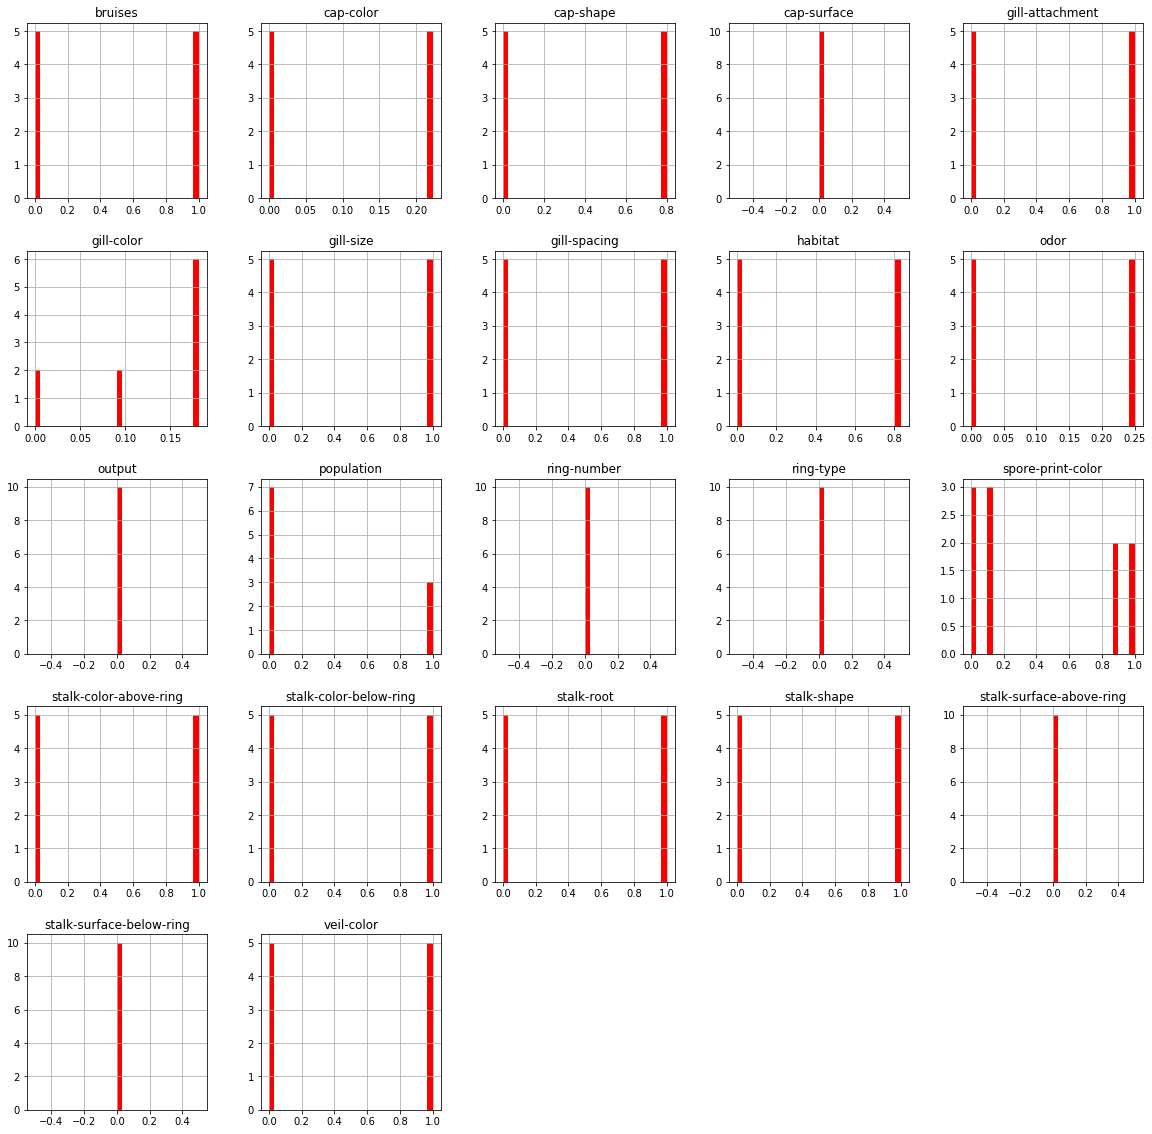

In [12]:
data_check.hist(bins=30, figsize=(20,20), color='r')

/home/saima/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/saima/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/saima/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/saima/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/saima/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


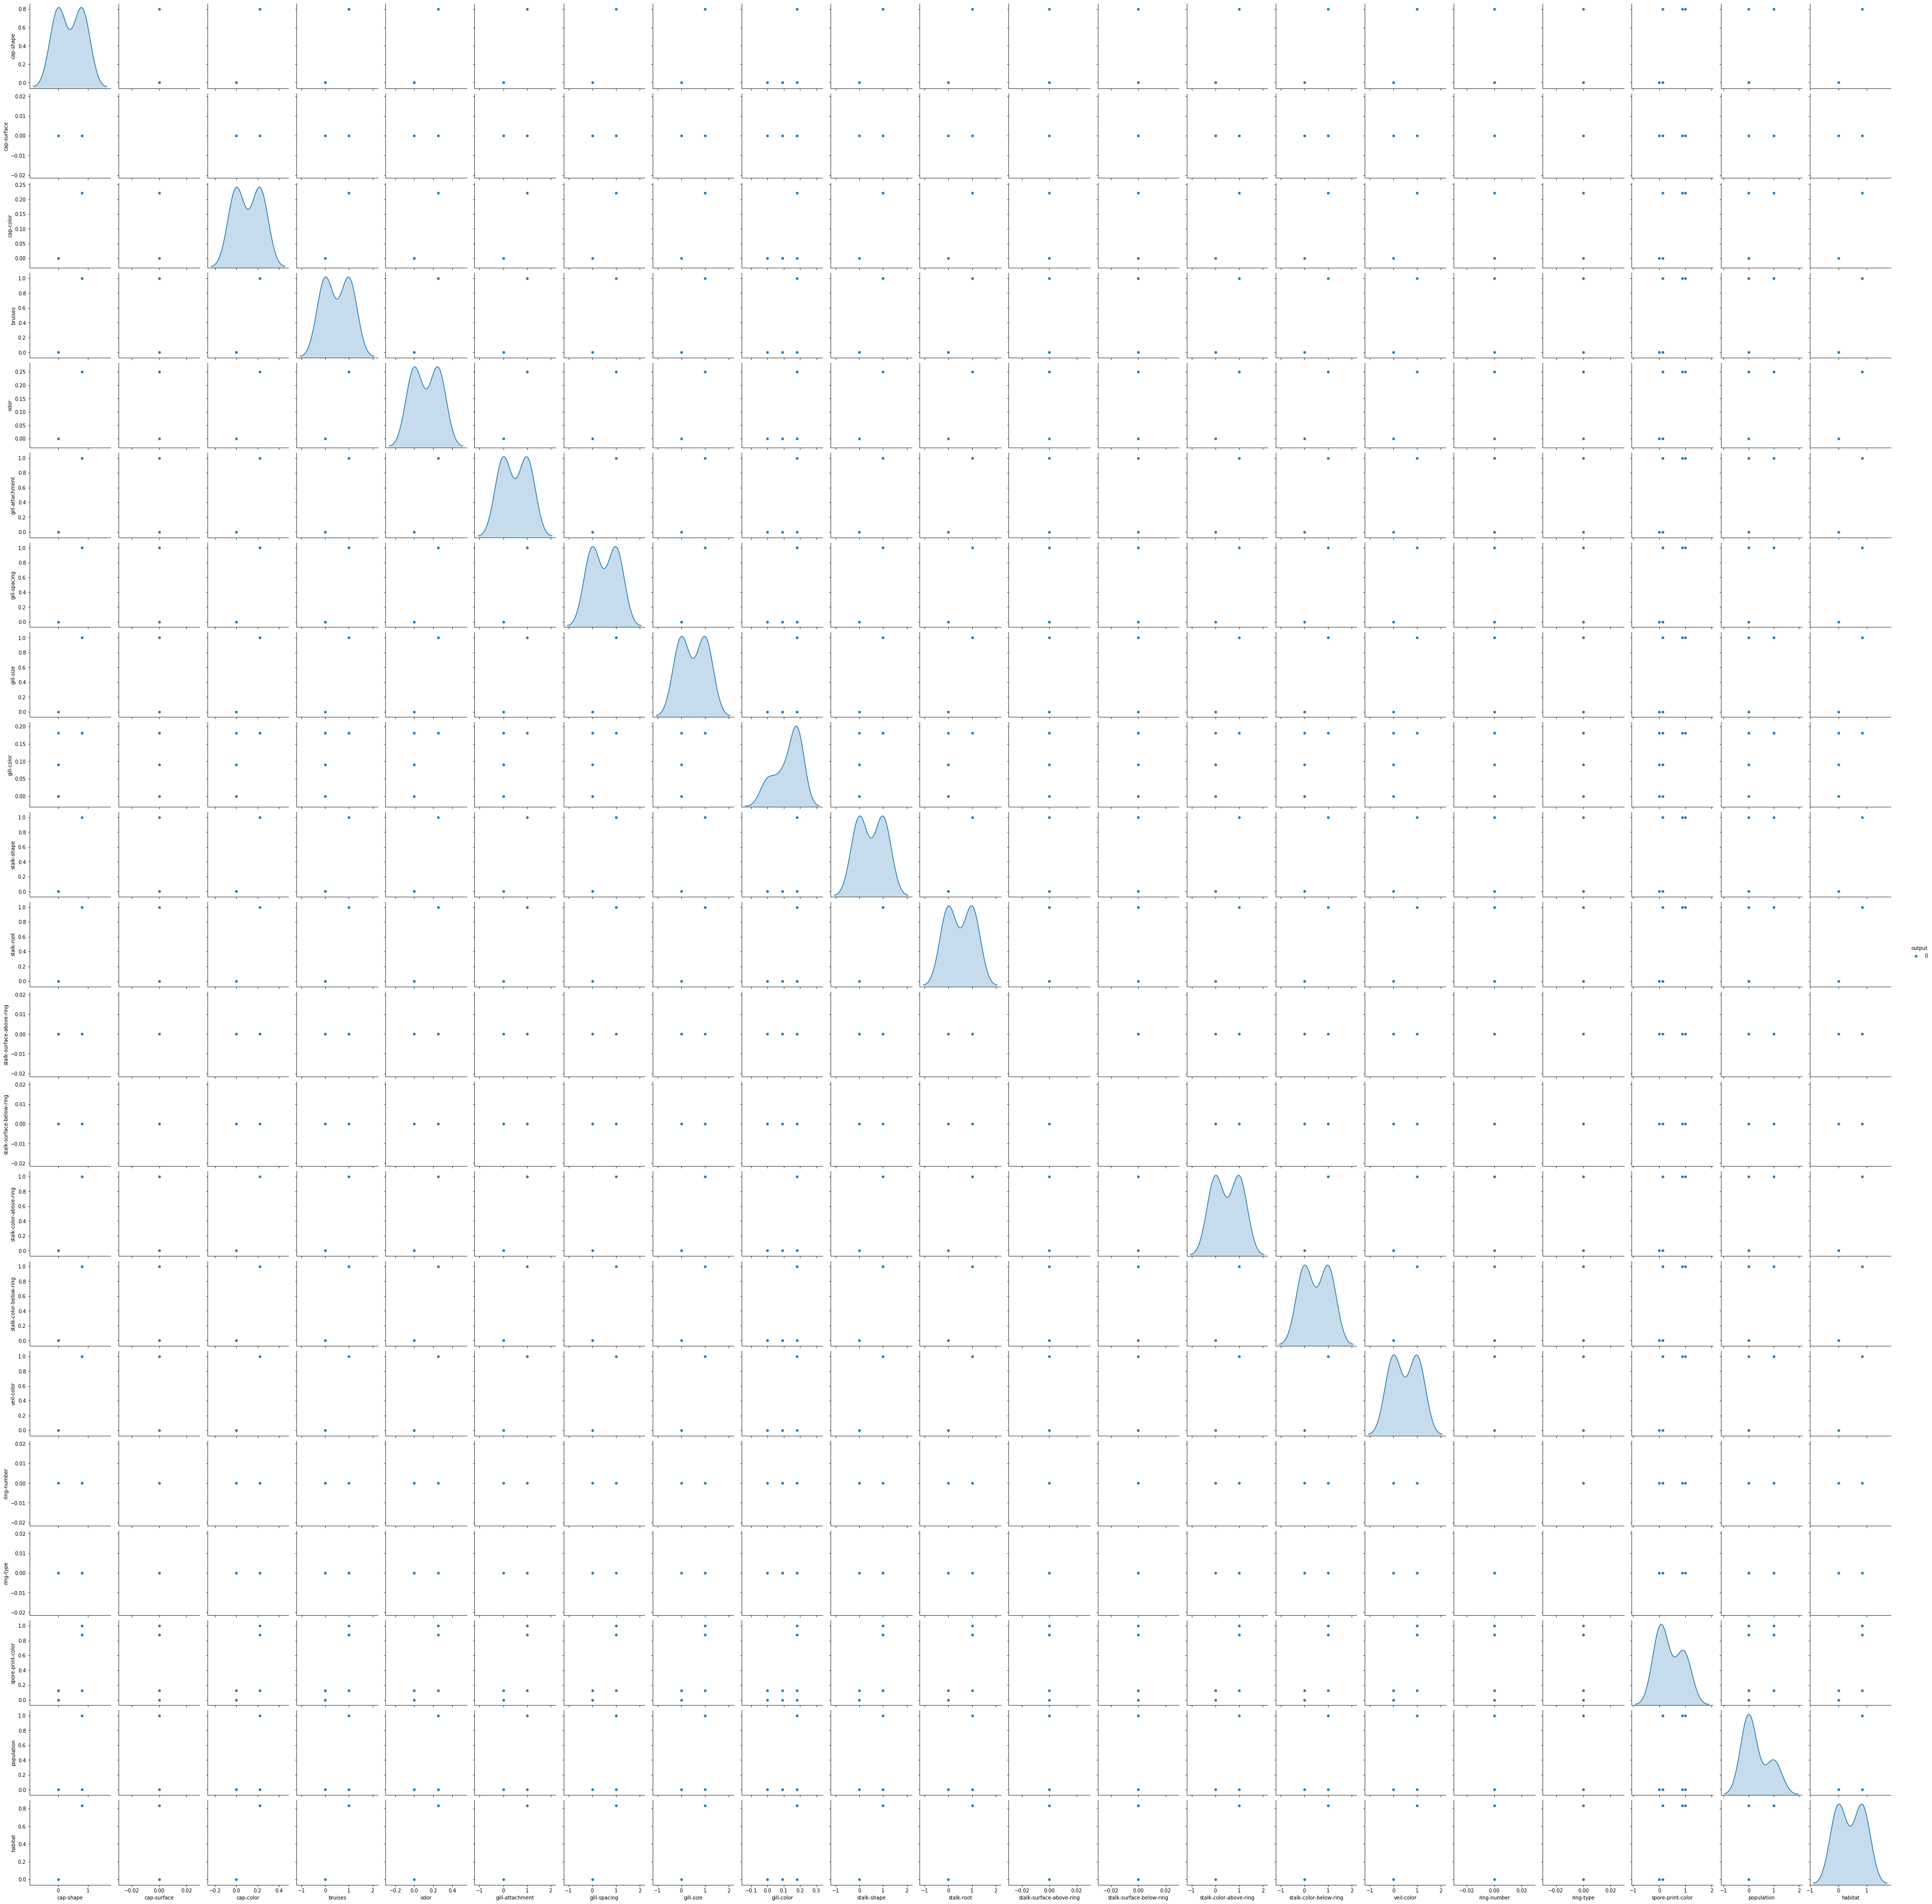

In [13]:
import seaborn as sns
sns.pairplot(data_check, hue='output')

# Preparing data for machine learning
Now we will split the dataset in x and y

In [15]:
from sklearn.model_selection import train_test_split
 # "class" column as numpy array.
y = data["output"].values  
 # All data except "class" column. I didn't use normalization because all data has values between 0 and 1.
x = data.drop(["output"], axis=1).values   
# Split data for train and test.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)    

# Creating fuction to evaluate models performance

In [16]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score



def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

# Classification Methods

In [17]:
#Logistic Regression Classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))

Test Accuracy: 99.58%


In [18]:
#Training Result
print_score(lr,x_train,y_train,x_test,y_test,train=True)

Training results:

Accuracy Score: 0.9948

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3585
           1       1.00      0.99      0.99      3147

    accuracy                           0.99      6732
   macro avg       0.99      0.99      0.99      6732
weighted avg       0.99      0.99      0.99      6732


Confusion Matrix:
[[3573   12]
 [  23 3124]]

Average Accuracy:	0.9932

Standard Deviation:	0.0036


In [19]:
#Test Result
print_score(lr,x_train,y_train,x_test,y_test,train=False)

Test results:

Accuracy Score: 0.9958

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       903
           1       1.00      0.99      1.00       781

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684


Confusion Matrix:
[[900   3]
 [  4 777]]



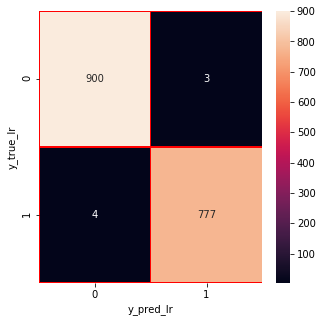

In [20]:
from sklearn.metrics import confusion_matrix
y_pred_lr = lr.predict(x_test)
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

In [21]:
#KNN Classification
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i
print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


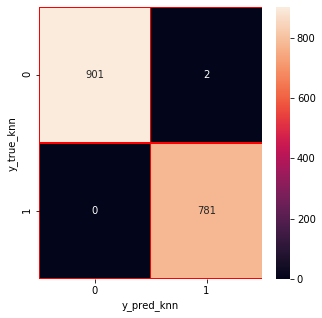

In [22]:
from sklearn.metrics import confusion_matrix
y_pred_knn = knn.predict(x_test)
y_true_knn = y_test
cm = confusion_matrix(y_true_knn, y_pred_knn)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_knn")
plt.ylabel("y_true_knn")
plt.show()

In [23]:
#SVM Classification
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))

Test Accuracy: 99.7%


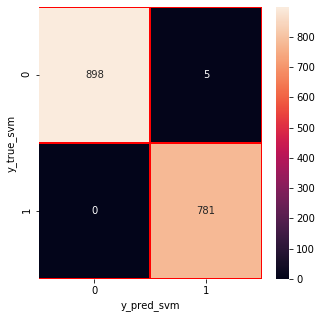

In [24]:
from sklearn.metrics import confusion_matrix
y_pred_svm = svm.predict(x_test)
y_true_svm = y_test
cm = confusion_matrix(y_true_svm, y_pred_svm)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_svm")
plt.ylabel("y_true_svm")
plt.show()

In [25]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(nb.score(x_test,y_test)*100,2)))

Test Accuracy: 96.02%


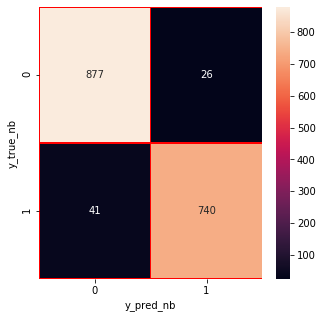

In [26]:
from sklearn.metrics import confusion_matrix
y_pred_nb = nb.predict(x_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()

In [27]:
#Decision Tree classicfication
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


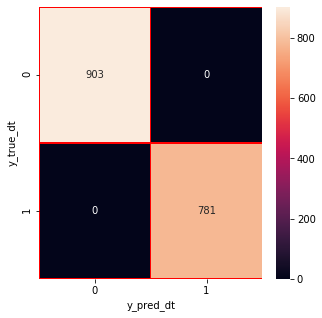

In [28]:
from sklearn.metrics import confusion_matrix
y_pred_dt = dt.predict(x_test)
y_true_dt = y_test
cm = confusion_matrix(y_true_dt, y_pred_dt)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_dt")
plt.ylabel("y_true_dt")
plt.show()

In [29]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


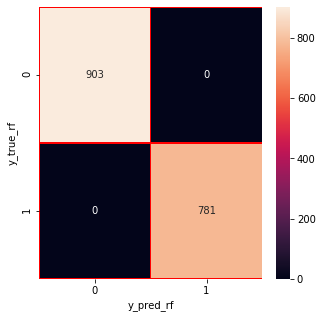

In [30]:
y_pred_rf = rf.predict(x_test)
y_true_rf = y_test
cm = confusion_matrix(y_true_rf, y_pred_rf)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()

# Artificial Neural Network

In [31]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [32]:
#Separating predictors and  Response


X=data.drop('output',axis=1) #Predictors
y=data['output'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0


In [33]:
#Encoding categorical data label encoding


from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [34]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
# Getting dummy variables


X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#Spliting dataset into trainig and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
#Applying PCA with n_components = 2

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [40]:
#Functions to visualize Training & Test Set Results.




def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

In [41]:
#initialize classifier

classifier = Sequential()

In [42]:
#Adding Layers

classifier.add(Dense(8, kernel_initializer='uniform', activation= 'relu', input_dim = 2))
classifier.add(Dense(6, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(4, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [43]:
#Fitting ANN to Training Set


classifier.fit(X_train,y_train,batch_size=10,epochs=100)

Train on 5891 samples
Epoch 1/100
5891/5891 [==============================] - 2s 325us/sample - loss: 0.6922 - acc: 0.5311
Epoch 2/100
5891/5891 [==============================] - 1s 156us/sample - loss: 0.6913 - acc: 0.5318
Epoch 3/100
5891/5891 [==============================] - 1s 153us/sample - loss: 0.6912 - acc: 0.5318
Epoch 4/100
5891/5891 [==============================] - 1s 160us/sample - loss: 0.6912 - acc: 0.5318
Epoch 5/100
5891/5891 [==============================] - 1s 162us/sample - loss: 0.6912 - acc: 0.5318
Epoch 6/100
5891/5891 [==============================] - 1s 168us/sample - loss: 0.6912 - acc: 0.5318
Epoch 7/100
5891/5891 [==============================] - 1s 172us/sample - loss: 0.6912 - acc: 0.5318
Epoch 8/100
5891/5891 [==============================] - 1s 181us/sample - loss: 0.6912 - acc: 0.5318
Epoch 9/100
5891/5891 [==============================] - 1s 184us/sample - loss: 0.6912 - acc: 0.5318
Epoch 10/100
5891/5891 [==============================] - 1s

5891/5891 [==============================] - 1s 128us/sample - loss: 0.6912 - acc: 0.5318
Epoch 81/100
5891/5891 [==============================] - 1s 127us/sample - loss: 0.6912 - acc: 0.5318
Epoch 82/100
5891/5891 [==============================] - 1s 138us/sample - loss: 0.6912 - acc: 0.5318
Epoch 83/100
5891/5891 [==============================] - 1s 137us/sample - loss: 0.6912 - acc: 0.5318
Epoch 84/100
5891/5891 [==============================] - 1s 144us/sample - loss: 0.6912 - acc: 0.5318
Epoch 85/100
5891/5891 [==============================] - 1s 134us/sample - loss: 0.6912 - acc: 0.5318
Epoch 86/100
5891/5891 [==============================] - 1s 137us/sample - loss: 0.6912 - acc: 0.5318
Epoch 87/100
5891/5891 [==============================] - 1s 132us/sample - loss: 0.6912 - acc: 0.5318
Epoch 88/100
5891/5891 [==============================] - 1s 131us/sample - loss: 0.6912 - acc: 0.5318
Epoch 89/100
5891/5891 [==============================] - 1s 133us/sample - loss: 0.69

In [44]:
#Predicting the Test Set Results

y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

In [45]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))

[[1355    0]
 [1170    0]]


In [46]:
#Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1355
           1       0.00      0.00      0.00      1170

    accuracy                           0.54      2525
   macro avg       0.27      0.50      0.35      2525
weighted avg       0.29      0.54      0.37      2525



/home/saima/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


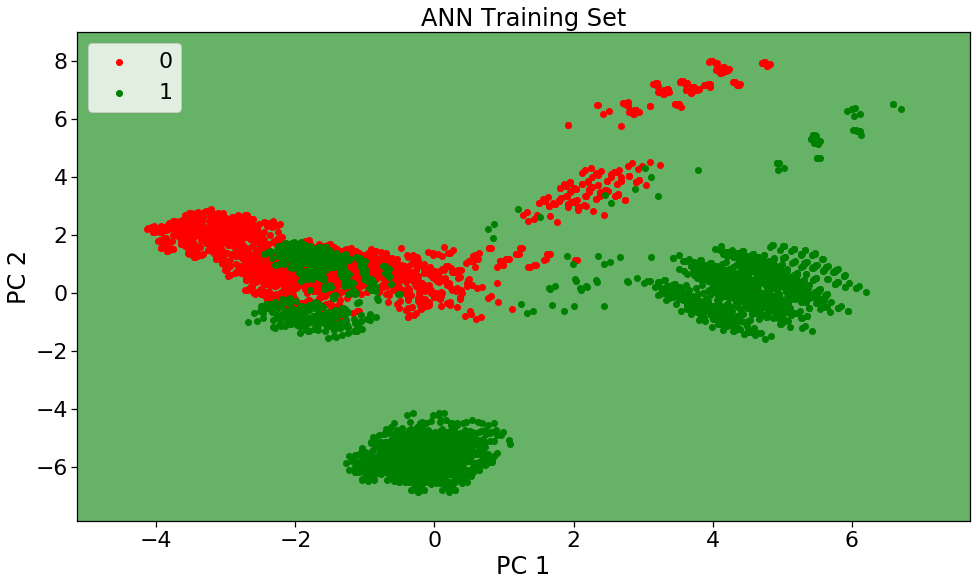

In [47]:
#Visualizing ANN Training Set results
visualization_train(model='ANN')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


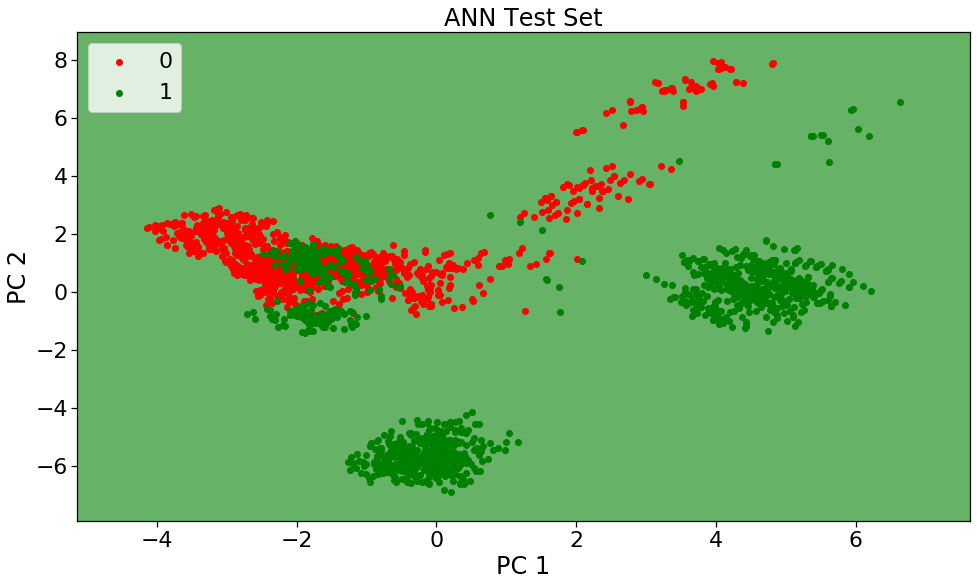

In [48]:
#Visualizing ANN Test Set results
visualization_test(model='ANN')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


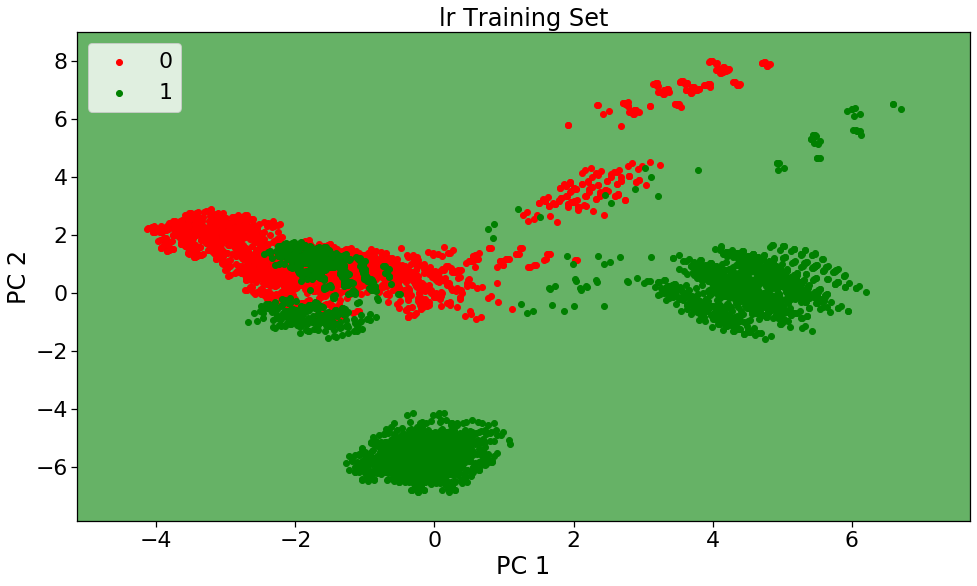

In [49]:
visualization_train(model='lr')